<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Authors: [Yury Kashnitskiy](https://yorko.github.io) and [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/). Translated and edited by  [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #1. Spring 2019 <br> 

## <center>Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Exploratory data analysis with Pandas](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic01_pandas_data_analysis/topic1_pandas_data_analysis.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-part-2-seaborn-and-plotly) 
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 
 - you can also practice with demo assignments, which are simpler and already shared with solutions: [A1 demo](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset), [solution](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution), [A2 demo](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data), [solution](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution)

### Your task is to:
 1. write code and perform computations in the cells below
 2. choose answers in the [webform](https://docs.google.com/forms/d/1Q_5rY7Paed4Xc_THtrfE3OSaB3sJerYuJ7NCHtqRbKs). Solutions will be shared only with those who've filled in this form 
 3. submit answers with some email and **remember it**! This will be your ID during the course. Specify your real full name in the form as well (no nicks allowed in the final top-100 [rating](https://mlcourse.ai/rating)). If in doubt, you can re-submit the form till the deadline for A1, no problem, but stick to only one email.
 
### <center> Deadline for A1: 2019 February 24, 20:59 GMT (London time)
    
You'll get up to 12 credits for this assignment - the web-form score will be halved and rounded.

### How to get help
In [ODS Slack](https://opendatascience.slack.com) (if you still don't have access, fill in the [form](https://docs.google.com/forms/d/1BMqcUc-hIQXa0HB_Q2Oa8vWBtGHXk8a6xo5gPnMKYKA/edit) mentioned on the mlcourse.ai main page), we have a channel **#mlcourse_ai_news** with announcements from the course team.
You can discuss the course content freely in the **#mlcourse_ai** channel (we still have a huge Russian-speaking group, they have a separate channel **#mlcourse_ai_rus**).

Here's how you reply in a thread (press this dialog icon to drill down into a thread):

<img src="../../img/start_a_thread.png" />

Please stick to special threads for your questions:
 - [#a1_q1-5](https://opendatascience.slack.com/archives/C91N8TL83/p1549882488049500) for questions 1-5 below
 - [#a1_q6-10](https://opendatascience.slack.com/archives/C91N8TL83/p1549882494049700) for questions 6-10 below
 - [#a1_q11-15](https://opendatascience.slack.com/archives/C91N8TL83/p1549882499049900) for questions 11-15 below
 - [#a1_q16-20](https://opendatascience.slack.com/archives/C91N8TL83/p1549882508050200) for questions 16-20 below
 
Help each other without sharing correct code and answers. Our TA Maxim @maximkeremet is there to help (only in the mentioned threads, do not write to him directly).

Lastly, you can save useful messages by pinning them, further you can find pinned items on the top, just below the channel name:

<img src="../../img/pinned_item.png" />

In [0]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb, [alternative link](https://drive.google.com/file/d/1C5nTzitvJ0ho2Crpqnghg9r2yq98Xxun/view?usp=sharing)). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [2]:
!wget http://stat-computing.org/dataexpo/2009/2008.csv.bz2

--2019-02-26 13:53:26--  http://stat-computing.org/dataexpo/2009/2008.csv.bz2
Resolving stat-computing.org (stat-computing.org)... 52.218.160.55
Connecting to stat-computing.org (stat-computing.org)|52.218.160.55|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113753229 (108M) [application/x-bzip2]
Saving to: ‘2008.csv.bz2’

2008.csv.bz2        100%[===================>] 108.48M  35.0MB/s    in 3.3s    

2019-02-26 13:53:29 (33.4 MB/s) - ‘2008.csv.bz2’ saved [113753229/113753229]



In [0]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [4]:
%%time
# change the path if needed
path = '2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 41.5 s, sys: 770 ms, total: 42.3 s
Wall time: 42.3 s


**Check the number of rows and columns and print column names.**

In [5]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [7]:
flights_df.head()

Year  Month  DayofMonth  DayOfWeek  DepTime UniqueCarrier  FlightNum  \
0  2008      1           3          4   2003.0            WN        335   
1  2008      1           3          4    754.0            WN       3231   
2  2008      1           3          4    628.0            WN        448   
3  2008      1           3          4    926.0            WN       1746   
4  2008      1           3          4   1829.0            WN       3920   

   ArrDelay  DepDelay Origin Dest  Distance  Cancelled CancellationCode  \
0     -14.0       8.0    IAD  TPA       810          0              NaN   
1       2.0      19.0    IAD  TPA       810          0              NaN   
2      14.0       8.0    IND  BWI       515          0              NaN   
3      -6.0      -4.0    IND  BWI       515          0              NaN   
4      34.0      34.0    IND  BWI       515          0              NaN   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0           NaN           NaN       NaN            NaN                NaN  
1           NaN           NaN       NaN            NaN                NaN  
2           NaN           NaN       NaN            NaN                NaN  
3           NaN           NaN       NaN            NaN                NaN  
4           2.0           0.0       0.0            0.0               32.0

**Transpose the frame to see all features at once.**

In [8]:
flights_df.head().T

0     1     2     3     4
Year               2008  2008  2008  2008  2008
Month                 1     1     1     1     1
DayofMonth            3     3     3     3     3
DayOfWeek             4     4     4     4     4
DepTime            2003   754   628   926  1829
UniqueCarrier        WN    WN    WN    WN    WN
FlightNum           335  3231   448  1746  3920
ArrDelay            -14     2    14    -6    34
DepDelay              8    19     8    -4    34
Origin              IAD   IAD   IND   IND   IND
Dest                TPA   TPA   BWI   BWI   BWI
Distance            810   810   515   515   515
Cancelled             0     0     0     0     0
CancellationCode    NaN   NaN   NaN   NaN   NaN
CarrierDelay        NaN   NaN   NaN   NaN     2
WeatherDelay        NaN   NaN   NaN   NaN     0
NASDelay            NaN   NaN   NaN   NaN     0
SecurityDelay       NaN   NaN   NaN   NaN     0
LateAircraftDelay   NaN   NaN   NaN   NaN    32

**Examine data types of all features and total dataframe size in memory.**

In [0]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [0]:
flights_df.describe().T

count         mean          std     min     25%  \
Year               7009728.0  2008.000000     0.000000  2008.0  2008.0   
Month              7009728.0     6.375130     3.406737     1.0     3.0   
DayofMonth         7009728.0    15.728015     8.797068     1.0     8.0   
DayOfWeek          7009728.0     3.924182     1.988259     1.0     2.0   
DepTime            6873482.0          NaN          NaN     1.0   928.0   
FlightNum          7009728.0  2224.200105  1961.715999     1.0   622.0   
ArrDelay           6855029.0          NaN          NaN  -519.0   -10.0   
DepDelay           6873482.0          NaN          NaN  -534.0    -4.0   
Distance           7009728.0   726.387029   562.101803    11.0   325.0   
Cancelled          7009728.0     0.019606     0.138643     0.0     0.0   
CarrierDelay       1524735.0          NaN          NaN     0.0     0.0   
WeatherDelay       1524735.0          NaN          NaN     0.0     0.0   
NASDelay           1524735.0          NaN          NaN     0.0     0.0   
SecurityDelay      1524735.0          NaN          NaN     0.0     0.0   
LateAircraftDelay  1524735.0          NaN          NaN     0.0     0.0   

                      50%     75%     max  
Year               2008.0  2008.0  2008.0  
Month                 6.0     9.0    12.0  
DayofMonth           16.0    23.0    31.0  
DayOfWeek             4.0     6.0     7.0  
DepTime            1325.0  1728.0  2400.0  
FlightNum          1571.0  3518.0  9743.0  
ArrDelay             -2.0    12.0  2460.0  
DepDelay             -1.0     8.0  2468.0  
Distance            581.0   954.0  4962.0  
Cancelled             0.0     0.0     1.0  
CarrierDelay          0.0    16.0  2436.0  
WeatherDelay          0.0     0.0  1352.0  
NASDelay              6.0    21.0  1357.0  
SecurityDelay         0.0     0.0   392.0  
LateAircraftDelay     0.0    26.0  1316.0

**Count unique Carriers and plot their relative share of flights:**

In [0]:
flights_df['UniqueCarrier'].nunique()

20

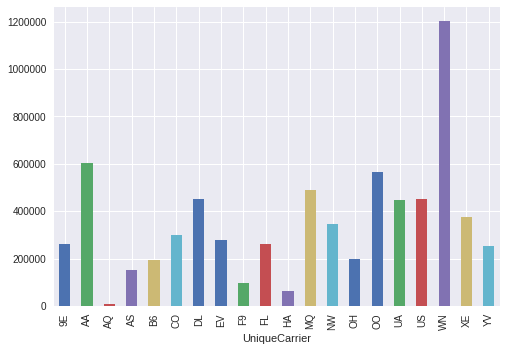

In [0]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [0]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [0]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [0]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek       1       2       3       4       5      6      7
Month                                                          
1           80807   97298  100080  102043   81940  67178  76419
2           81504   79700   80587   82158  102726  66462  76099
3          103210   81159   82307   82831   82936  86153  97494
4           82463  100785  102586   82799   82964  68304  78225
5           80626   79884   81264  102572  102878  84493  74576
6          104168   82160   82902   83617   83930  72322  99566
7           84095  103429  103315  105035   79349  72219  80489
8           82983   80895   81773   82625  103878  86155  93970
9           94300   91533   74057   75589   75881  58343  71205
10          75131   72195   91900   94123   93894  58168  70794
11          74214   72443   73653   68071   70484  76031  88376
12          92700   90568   85241   70761   74306  61708  69674

**It can also be handy to color such tables in order to easily notice outliers:**

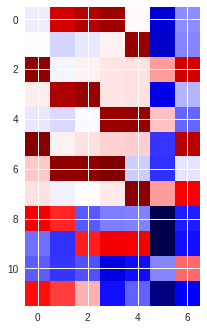

In [0]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

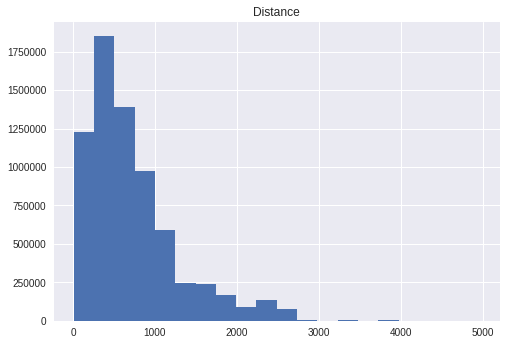

In [0]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [0]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [0]:
num_flights_by_date = flights_df.groupby('Date').size()

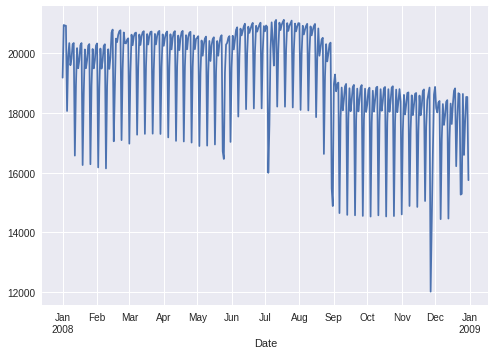

In [0]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

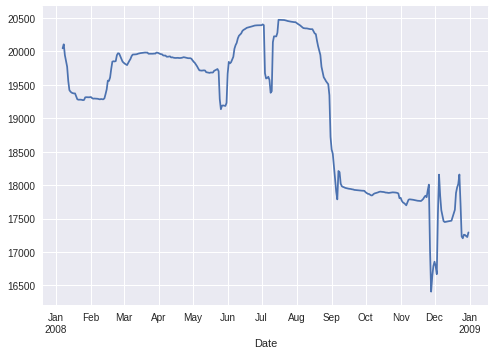

In [0]:
num_flights_by_date.rolling(window=7).mean().plot();

**We'll need a new column in our dataset - departure hour, let's create it.**

As we see, `DepTime` is distributed from 1 to 2400 (it is given in the `hhmm` format, check the [column description](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) again). We'll treat departure hour as `DepTime` // 100 (divide by 100 and apply the `floor` function). However, now we'll have both hour 0 and hour 24. Hour 24 sounds strange, we'll set it to be 0 instead (a typical imperfectness of real data, however, you can check that it affects only 521 rows, which is sort of not a big deal). So now values of a new column `DepHour` will be distributed from 0 to 23. There are some missing values, for now we won't fill in them, just ignore them. 

In [0]:
flights_df['DepHour'] = flights_df['DepTime'] // 100
flights_df['DepHour'].replace(to_replace=24, value=0, inplace=True)

In [10]:
flights_df['DepHour'].value_counts()

8.0     449224
6.0     446737
11.0    444702
7.0     436700
13.0    435917
9.0     434850
16.0    434017
17.0    432488
10.0    431460
12.0    424249
14.0    416875
15.0    411126
18.0    400784
19.0    387288
20.0    285991
21.0    254850
5.0     148167
22.0    119651
23.0     46103
0.0      20368
1.0       5861
4.0       3390
2.0       1851
3.0        833
Name: DepHour, dtype: int64

In [0]:
flights_df['DepHour'].describe()

count    6873482.0
mean           NaN
std            0.0
min            0.0
25%            9.0
50%           13.0
75%           17.0
max           23.0
Name: DepHour, dtype: float64

In [0]:
flights_df.head().T

0                    1  \
Year                              2008                 2008   
Month                                1                    1   
DayofMonth                           3                    3   
DayOfWeek                            4                    4   
DepTime                           2003                  754   
UniqueCarrier                       WN                   WN   
FlightNum                          335                 3231   
ArrDelay                           -14                    2   
DepDelay                             8                   19   
Origin                             IAD                  IAD   
Dest                               TPA                  TPA   
Distance                           810                  810   
Cancelled                            0                    0   
CancellationCode                   NaN                  NaN   
CarrierDelay                       NaN                  NaN   
WeatherDelay                       NaN                  NaN   
NASDelay                           NaN                  NaN   
SecurityDelay                      NaN                  NaN   
LateAircraftDelay                  NaN                  NaN   
Date               2008-01-03 00:00:00  2008-01-03 00:00:00   
DepHour                             20                    7   

                                     2                    3  \
Year                              2008                 2008   
Month                                1                    1   
DayofMonth                           3                    3   
DayOfWeek                            4                    4   
DepTime                            628                  926   
UniqueCarrier                       WN                   WN   
FlightNum                          448                 1746   
ArrDelay                            14                   -6   
DepDelay                             8                   -4   
Origin                             IND                  IND   
Dest                               BWI                  BWI   
Distance                           515                  515   
Cancelled                            0                    0   
CancellationCode                   NaN                  NaN   
CarrierDelay                       NaN                  NaN   
WeatherDelay                       NaN                  NaN   
NASDelay                           NaN                  NaN   
SecurityDelay                      NaN                  NaN   
LateAircraftDelay                  NaN                  NaN   
Date               2008-01-03 00:00:00  2008-01-03 00:00:00   
DepHour                              6                    9   

                                     4  
Year                              2008  
Month                                1  
DayofMonth                           3  
DayOfWeek                            4  
DepTime                           1829  
UniqueCarrier                       WN  
FlightNum                         3920  
ArrDelay                            34  
DepDelay                            34  
Origin                             IND  
Dest                               BWI  
Distance                           515  
Cancelled                            0  
CancellationCode                   NaN  
CarrierDelay                         2  
WeatherDelay                         0  
NASDelay                             0  
SecurityDelay                        0  
LateAircraftDelay                   32  
Date               2008-01-03 00:00:00  
DepHour                             18

In [0]:
# proportion of cancelled flights
flights_df['Cancelled'].mean()

0.019606181580797428

In [0]:
# numerical features of numerical features for cancelled flights
flights_df[flights_df['Cancelled'] == 1].mean()

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/pandas/core/nanops.py:121: RuntimeWarning: Mean of empty slice
  result = bn_func(values, axis=axis, **kwds)


Year                 2008.000000
Month                   5.691161
DayofMonth             15.203458
DayOfWeek               3.835798
DepTime                      inf
FlightNum            2807.746395
ArrDelay                     NaN
DepDelay               47.562500
Distance              581.042842
Cancelled               1.000000
CarrierDelay                 NaN
WeatherDelay                 NaN
NASDelay                     NaN
SecurityDelay                NaN
LateAircraftDelay            NaN
DepHour                13.781250
dtype: float64

In [0]:
flights_df.describe(include=['object', 'bool'])

UniqueCarrier   Origin     Dest CancellationCode
count        7009728  7009728  7009728           137434
unique            20      303      304                4
top               WN      ATL      ATL                B
freq         1201754   414513   414521            54904

### Now it's your turn. Answer the questions below.

**1. How many unique carriers are there in our dataset?**

- 10
- 15
- 20 **[+]**
- 25  


In [0]:
flights_df['UniqueCarrier'].nunique()

20

**2. We have  both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference?** <br>

*Hint:* Take a look at *Cancelled* to see the categories and *FlightNum* column to calculate unique flights for each category.

- Cancelled overweights completed by 329 flights
- Completed overweights cancelled by 6734860 flights **[+]**
- Cancelled overweights completed by 671 flights
- Completed overweights cancelled by 11088967 flights

In [13]:
cancelled_flights = flights_df[flights_df['Cancelled'] == 1].shape[0]
completed_flights = flights_df[flights_df['Cancelled'] == 0].shape[0]
print('There are {} cancelled flights.'.format(cancelled_flights))
print('There are {} completed flights.'.format(completed_flights))
print('The difference is {} flights.'.format(abs(completed_flights
                                                 - cancelled_flights)))

There are 137434 cancelled flights.
There are 6872294 completed flights.
The difference is 6734860 flights.


In [0]:
flights_df['Cancelled'].value_counts()

0    6872294
1     137434
Name: Cancelled, dtype: int64

Elegant solution

In [16]:
result_df = flights_df.groupby('Cancelled').size()
result_df

Cancelled
0    6872294
1     137434
dtype: int64

In [17]:
print('The difference is {} flights.'.format(abs(result_df[0]
                                                 - result_df[1])))

The difference is 6734860 flights.


In [0]:
flights_df['FlightNum'].nunique()

7539

In [0]:
flights_df.groupby(['Cancelled']).nunique()

Year  Month  DayofMonth  DayOfWeek  DepTime  UniqueCarrier  \
Cancelled                                                               
0             1     12          31          7     1348             20   
1             1     12          31          7      666             20   

           FlightNum  ArrDelay  DepDelay  Origin   ...     Distance  \
Cancelled                                          ...                
0               7534      1153      1134     303   ...         1433   
1               7205         0       246     300   ...         1290   

           Cancelled  CancellationCode  CarrierDelay  WeatherDelay  NASDelay  \
Cancelled                                                                      
0                  1                 0           984           599       574   
1                  1                 4             0             0         0   

           SecurityDelay  LateAircraftDelay  Date  DepHour  
Cancelled                                                   
0                    156                564   366       24  
1                      0                  0   366       23  

[2 rows x 21 columns]

There are 7539 unique flight numbers in our dataset.

In [0]:
flights_df.Cancelled.value_counts(normalize=True)

0    0.980394
1    0.019606
Name: Cancelled, dtype: float64

In [0]:
flights_df.Cancelled.value_counts()[0] - flights_df.Cancelled.value_counts()[1]

6734860

Roughly 98% of our flights are completed, while only about 0.02% of our flights are canceled. In absolute numbers, completed overweights cancelled by 6734860 flights.

**3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**

- yes, ATL
- yes, HNL
- yes, MSP **[+]**
- no

In [25]:
flights_df[flights_df['DepDelay'] == flights_df['DepDelay'].max()]['Dest']

2235378    MSP
Name: Dest, dtype: object

In [26]:
flights_df[flights_df['ArrDelay'] == flights_df['ArrDelay'].max()]['Dest']

1018798    MSP
Name: Dest, dtype: object

In [27]:
flights_df.sort_values('DepDelay', ascending=False).iloc[:1]['Dest']

2235378    MSP
Name: Dest, dtype: object

In [28]:
flights_df.sort_values('ArrDelay', ascending=False).iloc[:1]['Dest']

1018798    MSP
Name: Dest, dtype: object

The flights with the longest departure delay and a flight with the longest arrival delay both have the same destination airport: MSP.

In [0]:
flights_df.UniqueCarrier.value_counts()

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
Name: UniqueCarrier, dtype: int64

**4. Find the carrier that has the greatest number of cancelled flights.**

- AA = 17440
- MQ = 18331**[+]**
- WN = 12389
- CO  = 3702

MQ

In [0]:
pd.crosstab(flights_df['Cancelled'], flights_df['UniqueCarrier']).T

Cancelled            0      1
UniqueCarrier                
9E              255108   7100
AA              587445  17440
AQ                7758     42
AS              148963   2139
B6              192886   3205
CO              294753   3702
DL              445118   6813
EV              275549   5026
F9               95459    303
FL              259448   2236
HA               61256    570
MQ              472362  18331
NW              344746   2906
OH              191145   6462
OO              554723  12436
UA              438974  10541
US              447007   6582
WN             1189365  12389
XE              364518   9992
YV              245711   9219

To find the carrier with the most number of cancelled flights: 

In [30]:
flights_df[flights_df['Cancelled'] == 1]['UniqueCarrier'].mode()

0    MQ
dtype: object

If we want to know the number of cancelled flights as well:

In [31]:
flights_df[flights_df['Cancelled'] == 1]['UniqueCarrier'].value_counts().head()

MQ    18331
AA    17440
OO    12436
WN    12389
UA    10541
Name: UniqueCarrier, dtype: int64

**5. Let's examine departure time and consider distribution by hour (column `DepHour` that we've created earlier). Which hour has the highest percentage of flights?**<br>

- 1 am 
- 5 am  
- 8 am**[+]**
- 3 pm 

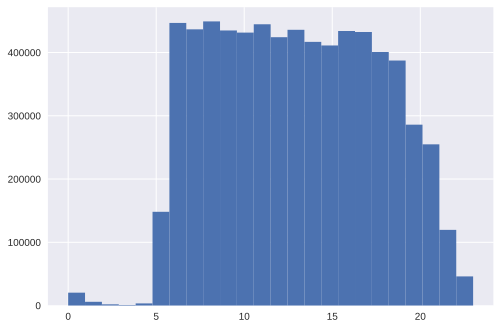

In [0]:
flights_df['DepHour'].hist(bins=24)

In [32]:
result_df = (flights_df['DepHour'].value_counts(normalize=True) * 100).sort_index()
print(result_df.head(10))

0.0    0.296327
1.0    0.085270
2.0    0.026930
3.0    0.012119
4.0    0.049320
5.0    2.155632
6.0    6.499428
7.0    6.353403
8.0    6.535610
9.0    6.326488
Name: DepHour, dtype: float64


In [33]:
result_df.idxmax()

8.0

Roughly 6.5% of all flights have a departure time at 8 am

**6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**<br>

- 2 am**[+]**
- 9 pm  
- 8 am  
- 3 am 

In [0]:
cancelled = (flights_df[flights_df['Cancelled'] == 1]['DepHour']\
            .value_counts(normalize=True) * 100).sort_index()

In [36]:
cancelled.idxmin()

2.0

**7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.**

- 3**[+]**
- 19
- 22
- 4 

In [42]:
set(range(24)).difference(cancelled.index)

{3}

3

**8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>

*Hint:* Consider only *completed* flights.

- 4
- 7
- 8**[+]**
- 17 

In [43]:
#solution
flights_df[(flights_df['Cancelled'] == 0)].groupby(['DepHour']).size().idxmax()

8.0

In [0]:
pd.crosstab(flights_df['DepHour'], flights_df['Cancelled'])

Cancelled       0   1
DepHour              
0.0         20361   7
1.0          5857   4
2.0          1850   1
3.0           833   0
4.0          3389   1
5.0        148143  24
6.0        446657  80
7.0        436617  83
8.0        449145  79
9.0        434794  56
10.0       431403  57
11.0       444643  59
12.0       424196  53
13.0       435870  47
14.0       416818  57
15.0       411053  73
16.0       433944  73
17.0       432415  73
18.0       400718  66
19.0       387207  81
20.0       285940  51
21.0       254768  82
22.0       119594  57
23.0        46079  24

8 am is the busiest hour, with 449145 flights.

**9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*Hint:* Consider only *completed* flights.

- no, there are no such cases
- yes, at 5-6 am**[+]**
- yes, at 9-10 am
- yes, at 2-4 pm

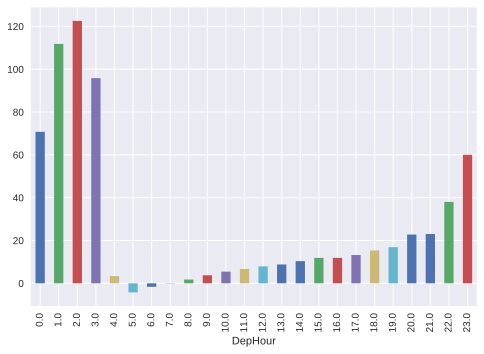

In [0]:
# You code here
flights_df.query("Cancelled == 0").groupby(['DepHour']).DepDelay.mean().plot(kind='bar');

Yes, we can see that planes on average departed earlier at 5-6 am.

**10. Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>

- at noon
- at 7 am 
- at 8 am
- at 10 am**[+]**

In [44]:
#solution
flights_df[(flights_df['Cancelled'] == 0) & 
           (flights_df['UniqueCarrier'] == 'MQ')].groupby(['DepHour']).size().idxmax()

10.0

In [0]:
flights_df.query("Cancelled == 0 & UniqueCarrier == 'MQ'").groupby(['DepHour'], as_index=False).FlightNum.count()

DepHour  FlightNum
0       0.0        163
1       1.0         14
2       2.0          4
3       5.0      12732
4       6.0      30982
5       7.0      29840
6       8.0      28757
7       9.0      32596
8      10.0      33063
9      11.0      31863
10     12.0      30043
11     13.0      31295
12     14.0      30149
13     15.0      30904
14     16.0      31276
15     17.0      28864
16     18.0      29362
17     19.0      25493
18     20.0      18664
19     21.0      12086
20     22.0       3471
21     23.0        741

The greatest number of planes depart at 10 am. 

**11. Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV**[+]**

In [0]:
# You code here
flights_df.query("Cancelled == 0").groupby('UniqueCarrier').FlightNum.count().sort_values(ascending=False)[:10]

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
Name: FlightNum, dtype: int64

In [45]:
#solution
top10_airlines = flights_df['UniqueCarrier'].value_counts().head(10)
top10_airlines

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

In [46]:
question_airlines = ['DL','AA', 'OO', 'EV']
set(question_airlines) - set(top10_airlines.index)

{'EV'}

EV is not it top 10 carriers in terms of number of completed flights.

**12. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- A = Carrier
- B = Weather conditions**[+]**
- C = National Air System
- D = Security reasons

In [0]:
flights_df.CancellationCode.value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

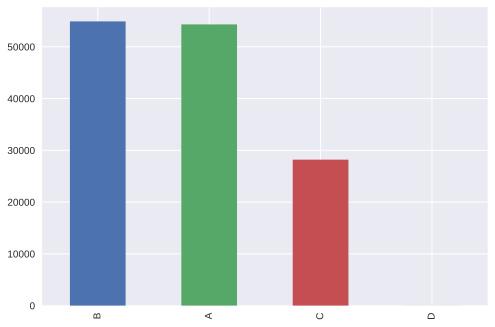

In [0]:
flights_df.CancellationCode.value_counts().plot(kind="bar");

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


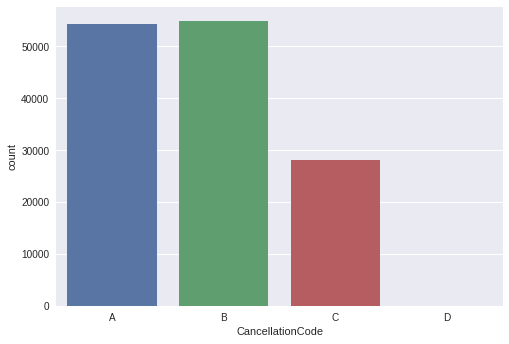

In [47]:
#solution
sns.countplot(flights_df['CancellationCode'].sort_values());

In [48]:
flights_df['CancellationCode'].mode()

0    B
dtype: object

Most frequent reason for flight cancelation is Weather Conditions.

**13. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (SFO-LAX)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

San-Francisco – Los-Angeles (SFO-LAX) is the most frequent route.

In [50]:
#solution
flights_df['Route'] = flights_df['Origin'] + '->' + flights_df['Dest']
flights_df['Route'].value_counts().head()

SFO->LAX    13788
LAX->SFO    13390
OGG->HNL    12383
LGA->BOS    12035
BOS->LGA    12029
Name: Route, dtype: int64

Or without creating a new feature

In [51]:
flights_df[['Origin','Dest']].groupby(['Origin','Dest']).size().idxmax()

('SFO', 'LAX')

**14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

_Hint_: consider only positive delays

- 449 
- 539 
- 549 
- 668**[+]**

In [0]:
completed_df = flights_df.query("Cancelled == 0 & WeatherDelay > 0")

In [0]:
completed_df.query("(Origin == 'LAX' & Dest == 'SFO') \
                  or (Origin == 'DAL' & Dest == 'HOU') \
                  or (Origin == 'SFO' & Dest == 'LAX') \
                  or (Origin == 'ORD' & Dest == 'LGA') \
                  or (Origin == 'HOU' & Dest == 'DAL')").shape[0]

668

668 flights contributing to a delay.

In [52]:
#solution
# find top5 routes with most delayed flights
top5_delayed = flights_df[flights_df['DepDelay'] > 0].groupby('Route')\
    .size().sort_values(ascending=False).head(5)
top5_delayed

Route
LAX->SFO    6253
DAL->HOU    5742
SFO->LAX    5322
ORD->LGA    5311
HOU->DAL    5288
dtype: int64

In [0]:
# reduce to only flights from top5 delayed routes
flights_df_top5_delays = flights_df[flights_df['Route'].isin(top5_delayed.index)]

In [54]:
# now the answer
(flights_df_top5_delays['WeatherDelay'] > 0).sum()

668

**15. Examine the hourly distribution of departure times. Choose all correct statements:**

 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.**[+]**

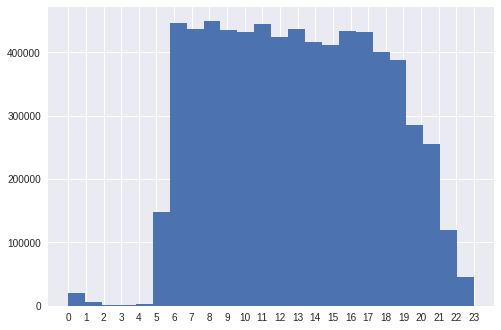

In [0]:
plt.hist(flights_df.DepHour, bins=24)
plt.xticks(np.arange(24))
plt.show();

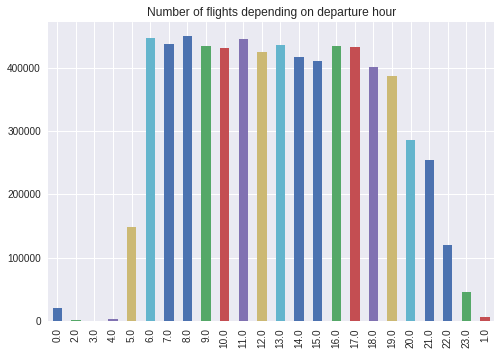

In [55]:
#solution
flights_df['DepHour'].value_counts(sort=False).plot(kind='bar', 
         title="Number of flights depending on departure hour");

In [0]:
num_flights_depHour = flights_df.groupby('DepHour').size()

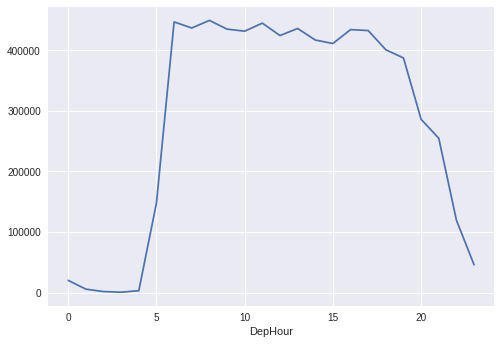

In [0]:
num_flights_depHour.plot();

In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.


**16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays **[+]**(working days). 
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.**[+]**

_Hint_: Look for official meteorological winter months for the Nothern Hemisphsere.

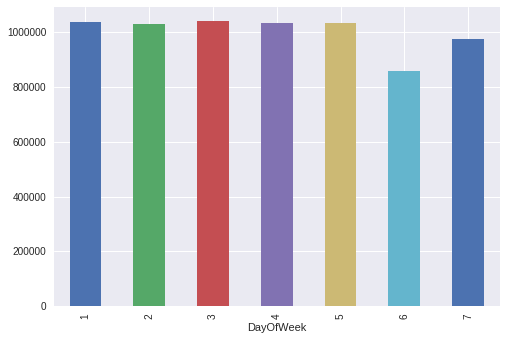

In [56]:
num_flights_by_day_of_week = flights_df.groupby('DayOfWeek').size()
num_flights_by_day_of_week.plot(kind='bar');

By the way, here is an illustrative example of "how to lie with statistics". Compare the next plot with the previous one.

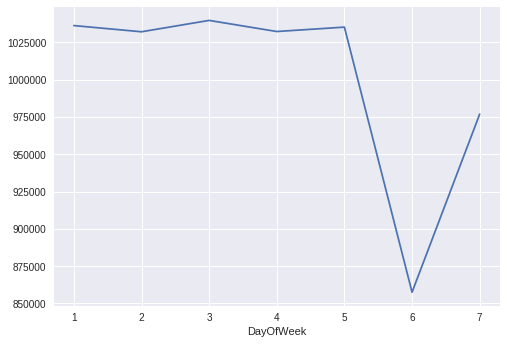

In [57]:
num_flights_by_day_of_week.plot();

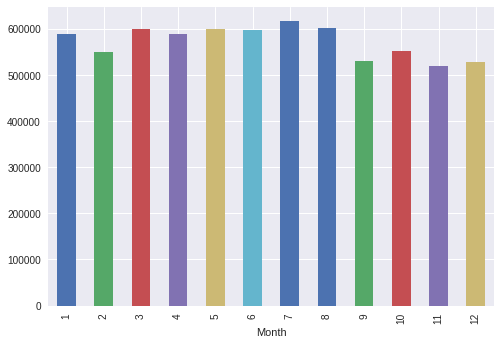

In [58]:
num_flights_by_month = flights_df[flights_df['Cancelled'] == 0].groupby('Month').size()
num_flights_by_month.plot(kind='bar');

In [0]:
flights_df.groupby('Month').size()

Month
1     605765
2     569236
3     616090
4     598126
5     606293
6     608665
7     627931
8     612279
9     540908
10    556205
11    523272
12    544958
dtype: int64

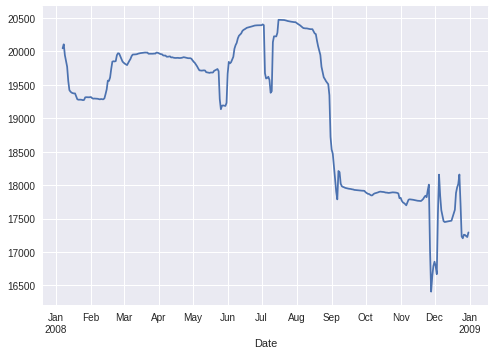

In [0]:
num_flights_by_date.rolling(window=7).mean().plot();

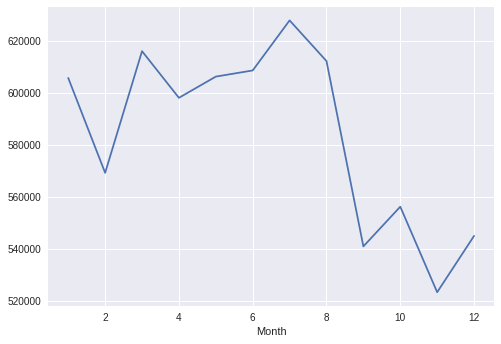

In [0]:
flights_df.groupby('Month').size().plot();

* The number of flights during weekends is less than during weekdays (working days)
* There are less flights during winter than during summer.

**17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- October has the lowest number of cancellations due to weather. **[+]**
- The highest number of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.**[+]**
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [0]:
flights_df.groupby('CancellationCode').size()

CancellationCode
A    54330
B    54904
C    28188
D       12
dtype: int64

In [0]:
labels = ['Carrier', 'Weather conditions', 'National Air System', 'Security reasons']

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


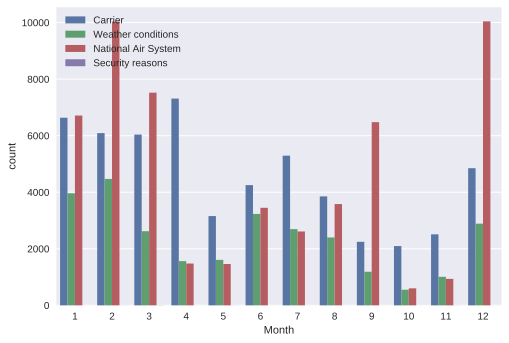

In [0]:
%config InlineBackend.figure_format = 'svg'
g = sns.countplot(x='Month', hue='CancellationCode', data=flights_df);
g.legend(labels)

* October has the lowest number of cancellations due to weather.
* April's top cancellation reason is carriers.

In [0]:
# create a month name list
import calendar

month_names = []

for month_idx in flights_df['Month'].unique():
    month_names.append((calendar.month_name[month_idx]))

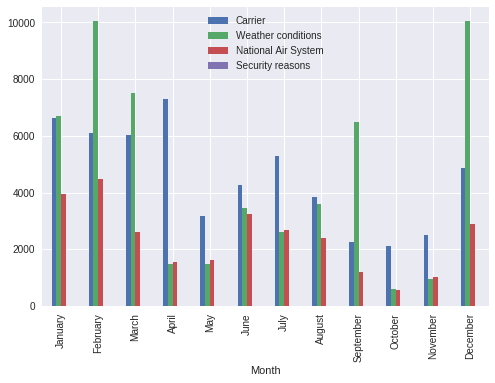

In [62]:
ax = flights_df.groupby(['Month', 'CancellationCode'])\
    .size().unstack().plot(kind='bar')

ax.set_xticklabels(month_names, rotation=90)
ax.legend(labels)
plt.show()

**18. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April**[+]**

In [64]:
#solution
flights_df.loc[flights_df['CancellationCode'] == 'A', 'Month'].value_counts().head()

4    7312
1    6635
2    6090
3    6038
7    5292
Name: Month, dtype: int64

In [63]:
flights_df.query('CancellationCode == "A"').groupby(['Month']).size().sort_values(ascending=False).head()

Month
4    7312
1    6635
2    6090
3    6038
7    5292
dtype: int64

April

Or, as a nice plot:

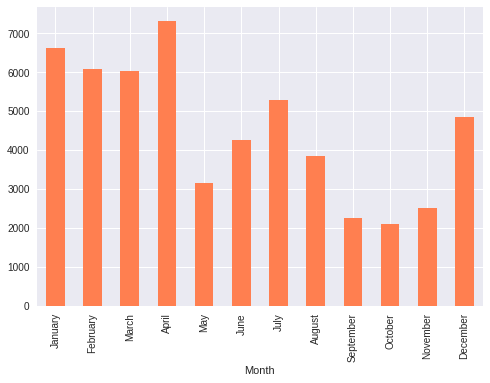

In [65]:
import matplotlib.colors as colors
import random 
import calendar

ax = flights_df[flights_df['CancellationCode'] == 'A']\
                                        .groupby(['Month'])['UniqueCarrier']\
                                        .count().plot(kind='bar', color='coral')
ax.set_xticklabels(month_names, rotation=90)
plt.show()

**19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA**[+]**

In [0]:
flights_df.query('CancellationCode == "A" & Month == 4').groupby('UniqueCarrier').size().sort_values(ascending=False).iloc[:1]

UniqueCarrier
AA    3696
dtype: int64

In [66]:
#solution
flights_df.loc[(flights_df['CancellationCode'] == 'A') & (flights_df['Month'] == 4),
               'UniqueCarrier'].value_counts().head()

AA    3696
WN     533
UA     494
YV     454
9E     391
Name: UniqueCarrier, dtype: int64

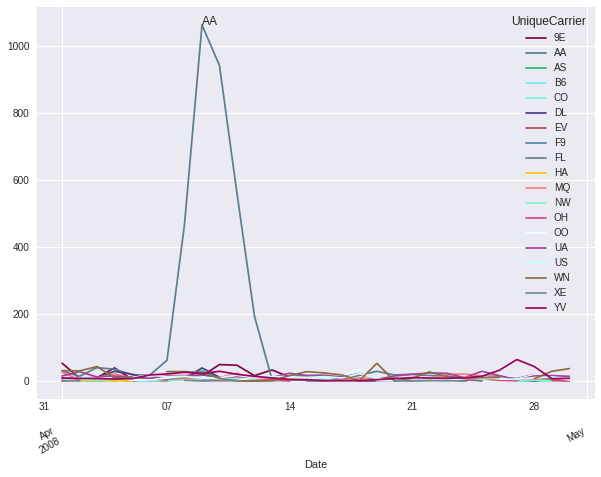

In [74]:
import matplotlib.colors as colors
import random 

colors_list = list(colors._colors_full_map.values())
selected_colors = random.sample(colors_list,20)

cancelled_Carrier_April = flights_df[(flights_df['CancellationCode'] == 'A') 
                                     & (flights_df['Month'] == 4)]\
                .groupby(['Date', 'UniqueCarrier']).size().unstack()

#get the peak coordinates for annotation
max_value = cancelled_Carrier_April.max().max()
carrier_of_max_value = cancelled_Carrier_April.max().idxmax()
date_of_max_value = cancelled_Carrier_April[carrier_of_max_value].idxmax()

fig, ax = plt.subplots()

cancelled_Carrier_April.plot(color=selected_colors, figsize=(10,8), ax=ax)
ax.annotate(carrier_of_max_value, (str(date_of_max_value), max_value))
fig.autofmt_xdate()

**20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

- EV
- OO
- AA
- AQ**[+]**

In [0]:
pos_delays_flights = flights_df.query("ArrDelay > 0 & DepDelay > 0 & ArrDelay < 75 & DepDelay < 70")

In [0]:
flights_df.ArrDelay.quantile(.95), flights_df.DepDelay.quantile(.95)

(75.0, 70.0)

In [0]:
pos_delays_flights.loc[:,['ArrDelay', 'DepDelay']].describe()

ArrDelay   DepDelay
count  1655813.0  1655813.0
mean         NaN        NaN
std          0.0        0.0
min          1.0        1.0
25%          8.0        7.0
50%         17.0       16.0
75%         33.0       31.0
max         74.0       69.0

In [0]:
pos_delays_flights.shape

(1655813, 21)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


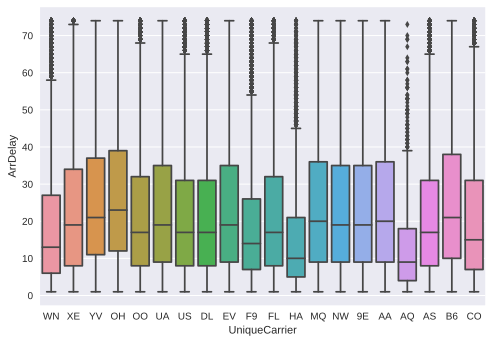

In [0]:
sns.boxplot(x='UniqueCarrier', y='ArrDelay', data=pos_delays_flights);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


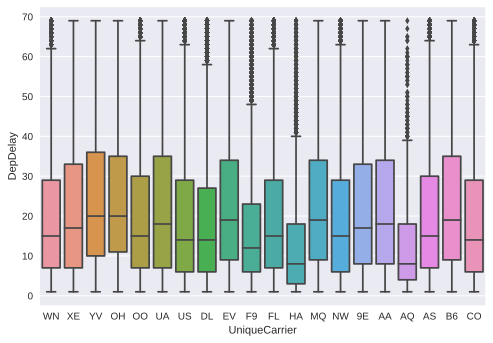

In [0]:
sns.boxplot(x='UniqueCarrier', y='DepDelay', data=pos_delays_flights);

In [0]:
pos_delays_flights.groupby('UniqueCarrier').median().loc[:, ['ArrDelay', 'DepDelay']]

ArrDelay  DepDelay
UniqueCarrier                    
9E                 23.0      21.0
AA                 24.0      22.0
AQ                 10.0       8.0
AS                 19.0      17.0
B6                 27.0      24.0
CO                 18.0      17.0
DL                 19.0      16.0
EV                 22.0      22.0
F9                 15.0      13.0
FL                 20.0      17.0
HA                 11.0       8.0
MQ                 23.0      22.0
NW                 22.0      17.0
OH                 28.0      25.0
OO                 20.0      18.0
UA                 23.0      22.0
US                 19.0      17.0
WN                 15.0      17.0
XE                 22.0      20.0
YV                 26.0      25.0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


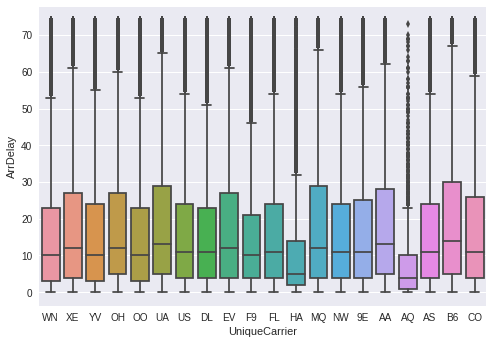

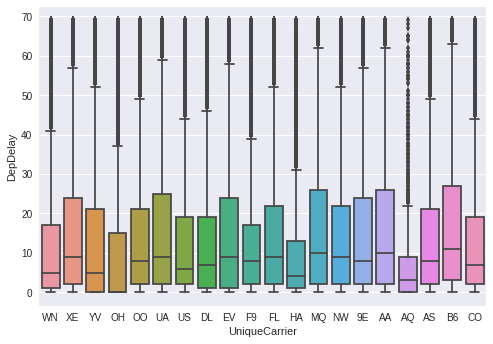

In [75]:
#solution
for delay_type in ['ArrDelay', 'DepDelay']:
    sub_df = flights_df[(flights_df[delay_type] >= 0) &
                        (flights_df[delay_type] < 
                         flights_df[delay_type].quantile(.95))]
    sns.boxplot(x='UniqueCarrier', y=delay_type, data=sub_df);
    plt.show()

AQ